<a id="Introduction"></a>
# **<font size="5">1. Credit Card Fraud Detection Dataset/Problem - Background (Context/Content)</font>**

![Credit Cards](https://www.nerdwallet.com/assets/blog/wp-content/uploads/2019/07/credit-cards-4-steps.jpg)

*Context*

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

*Content*

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

<a id="Import Dataset"></a>
# **<font size="5">2. Import Dataset</font>**

In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [35]:
import warnings
warnings.filterwarnings("ignore")

<a id="Exploratory Data Analysis"></a>
# **<font size="5">3. Exploratory Data Analysis</font>**

In [36]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* There are 284,807 instances in the dataset and 31 different variables (class being the target variable).

* There are no non-null values in the dataset.

In [38]:
df.shape

(284807, 31)

In [39]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


****3A. Univariate Analysis - Time, Amount, Class, V1 - V28****

In [41]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

* The amount of time that elapses between the first transaction in the dataset to the last is 172,792 seconds, which is around 2 days when converted.

<AxesSubplot:>

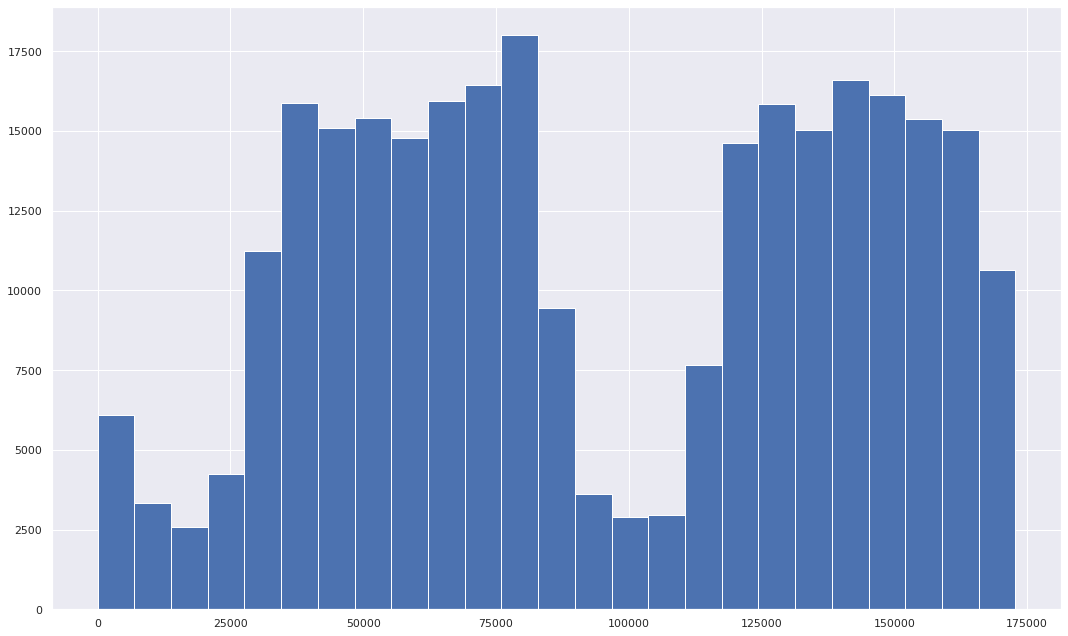

In [42]:
df['Time'].hist(bins=25)

* It does seem like there are a few relative lulls in the data in regards to amount of transactions (see 0 to around 25000, around 90000 to around 115000), which may possibly have to do simply with time of day, although specific times are not specified.

<AxesSubplot:xlabel='Amount'>

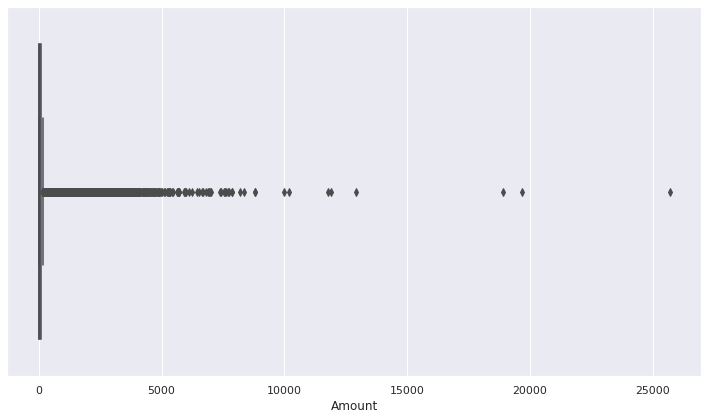

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
import seaborn as sns
sns.boxplot(df['Amount'])

* It definitely appears that there are a wide range of transaction amounts, some of which are obvious outliers. Most amounts seem fairly bunched within a range.

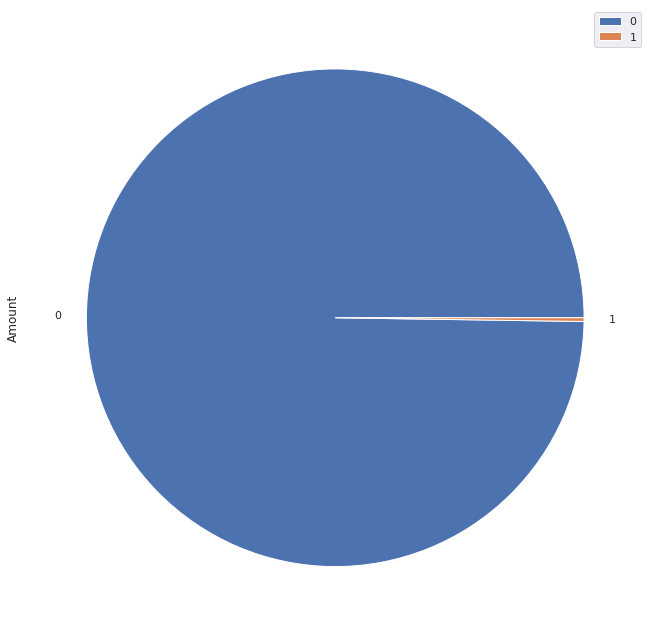

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby(['Class']).sum().plot(kind='pie', y = 'Amount')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

* The data appears to be extremely imbalanced; let us see if this really is the case.

In [45]:
df['Class'].value_counts()/np.float(len(df))

0    0.998273
1    0.001727
Name: Class, dtype: float64

* As explained in the background of the dataset above, only 0.172% of the dataset are positive (1s = frauds). This is significant for purposes of analysis.

<AxesSubplot:>

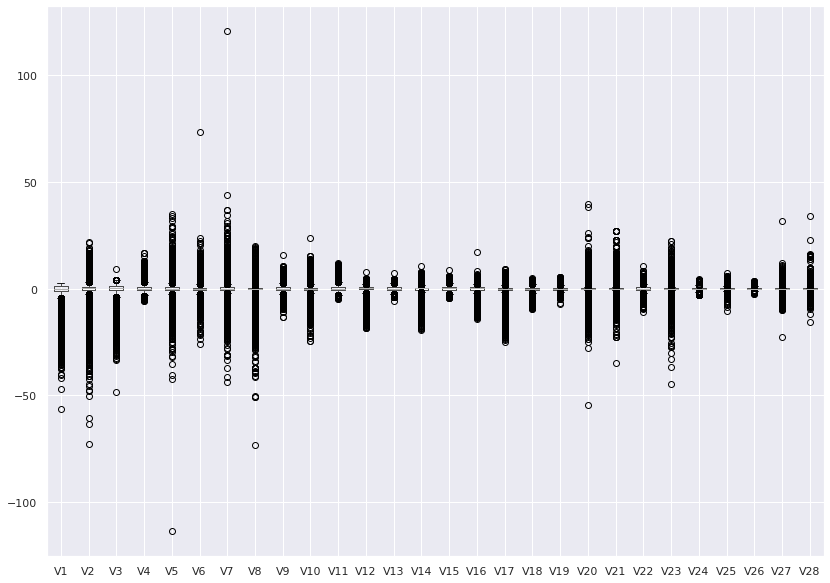

In [46]:
V_df = pd.DataFrame(data = df[[columns for columns in df.columns if columns != 'Time' and columns != 'Amount' and columns != 'Class']],\
                    columns = [columns for columns in df.columns if columns != 'Time' and columns != 'Amount' and columns != 'Class'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style( 'darkgrid' )
V_df.boxplot()

* The variables V1 - V28 are the components of the dataset determined by principal component analysis, it can be assumed these features are important, as principal components, by definition, are linear combinations of what are initial variables.

* Principal components are standardized, but there seem to be wide ranges and what is obviously outliers; we'll take a closer look later.

****3B. Bivariate Analysis of Time****

*Time and Amount*

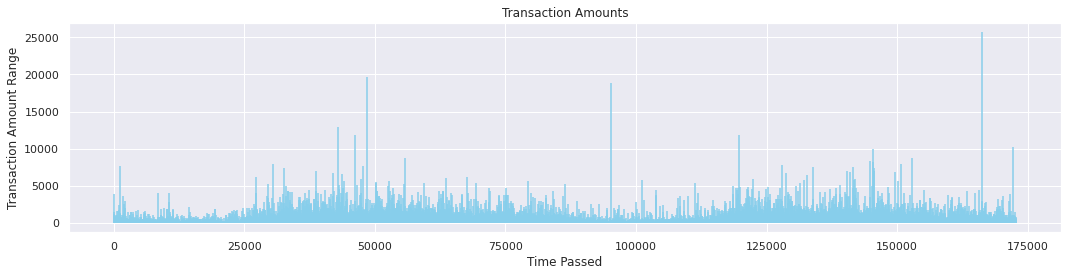

In [47]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(15, 4))
plt.vlines(x=df['Time'], ymin=0, ymax=df['Amount'], color='skyblue')
#plt.plot(df.Time,df.Amount, "o")
plt.title("Transaction Amounts")
plt.ylabel("Transaction Amount Range")
plt.xlabel("Time Passed")
plt.show()

* When not considering the obvious outlier transactions, there does not necessarily appear to be a strong correlation between when the transaction occurred and how much was spent during the transaction; if anything, it appears as if it trends in subtle waves up and down, but there is definitely no material incline or decline trend.

*Time and Class*

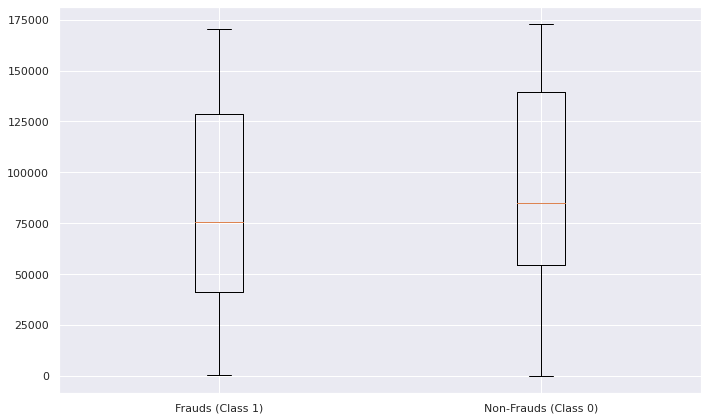

In [48]:
fraud_df = df.loc[df['Class'] == 1]
nonfraud_df = df.loc[df['Class'] == 0]
data_to_plot = [fraud_df['Time'], nonfraud_df['Time']]
plt.figure(figsize=(10, 6))
box = plt.boxplot(data_to_plot, labels=['Frauds (Class 1)', 'Non-Frauds (Class 0)'])

* Not much to learn when looking at the distribution of fraud and non-fraud data over the time passed, though there appear to be slight differences in when a majority of the data occurs for each classification, relatively speaking...let's see thisis numbers if possible.

In [49]:
print(nonfraud_df['Time'].describe(), '\n')
print(fraud_df['Time'].describe())

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64 

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


* For positive (fraud) data, most of the data occurs between 41248 seconds and 128483 seconds following the first transaction, while for negative (nonfraud) data, most of the data occurs between 54230 seconds and 139333 seconds following the first transaction...we can assume the fraudulent transactions, on a relative basis, happen earlier in the dataset.

* Interestingly, the last fraudulent transaction occurs at 170348 seconds, a full 2000+ seconds before the final transaction...may not be of importance, but something to note.

*Time and Transaction Frequency*

In [50]:
df_25000_non = df.loc[(df['Time'] <= 25000) & (df['Class'] == 0)]
df_25000_fraud = df.loc[(df['Time'] <= 25000) & (df['Class'] == 1)]
df_50000_non = df.loc[(df['Time'] >= 25000) & (df['Time'] <= 50000) & (df['Class'] == 0)]
df_50000_fraud = df.loc[(df['Time'] >= 25000) & (df['Time'] <= 50000) & (df['Class'] == 1)]
df_75000_non = df.loc[(df['Time'] >= 50000) & (df['Time'] <= 75000) & (df['Class'] == 0)]
df_75000_fraud = df.loc[(df['Time'] >= 50000) & (df['Time'] <= 75000) & (df['Class'] == 1)]
df_100000_non = df.loc[(df['Time'] >= 75000) & (df['Time'] <= 100000) & (df['Class'] == 0)]
df_100000_fraud = df.loc[(df['Time'] >= 75000) & (df['Time'] <= 100000) & (df['Class'] == 1)]
df_125000_non = df.loc[(df['Time'] >= 100000) & (df['Time'] <= 125000) & (df['Class'] == 0)]
df_125000_fraud = df.loc[(df['Time'] >= 100000) & (df['Time'] <= 125000) & (df['Class'] == 1)]
df_150000_non = df.loc[(df['Time'] >= 125000) & (df['Time'] <= 150000) & (df['Class'] == 0)]
df_150000_fraud = df.loc[(df['Time'] >= 125000) & (df['Time'] <= 150000) & (df['Class'] == 1)]
df_175000_non = df.loc[(df['Time'] >= 150000) & (df['Time'] <= 175000) & (df['Class'] == 0)]
df_175000_fraud = df.loc[(df['Time'] >= 150000) & (df['Time'] <= 175000) & (df['Class'] == 1)]

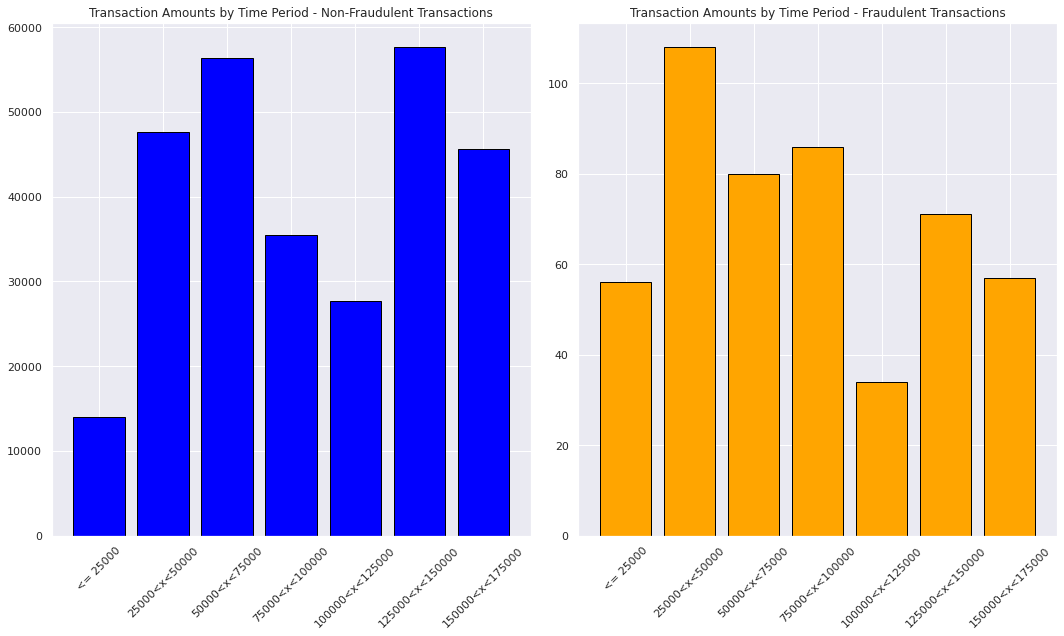

In [51]:
plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True

X = ['<= 25000','25000<x<50000','50000<x<75000','75000<x<100000','100000<x<125000', '125000<x<150000', '150000<x<175000']
NonFrauds = [len(df_25000_non),len(df_50000_non),len(df_75000_non),len(df_100000_non),len(df_125000_non),\
             len(df_150000_non),len(df_175000_non)]
Frauds = [len(df_25000_fraud),len(df_50000_fraud),len(df_75000_fraud),len(df_100000_fraud),len(df_125000_fraud),\
          len(df_150000_fraud),len(df_175000_fraud)]

fig = plt.figure()

axe1 = plt.subplot(121)
axe1.bar(X, NonFrauds, align='center', color='blue', edgecolor='black')
plt.title('Transaction Amounts by Time Period - Non-Fraudulent Transactions')
plt.xticks(rotation = 45)

axe2 = plt.subplot(122)
axe2.bar(X, Frauds, align='center', color='orange', edgecolor='black')
plt.title('Transaction Amounts by Time Period - Fraudulent Transactions')
plt.xticks(rotation = 45)

plt.show()

* But even so, most of the data is interspersed in a similar fashion (on a relative basis, as there are way more non-fraudulent cases than fraudulent).

*Time and V1-V28*

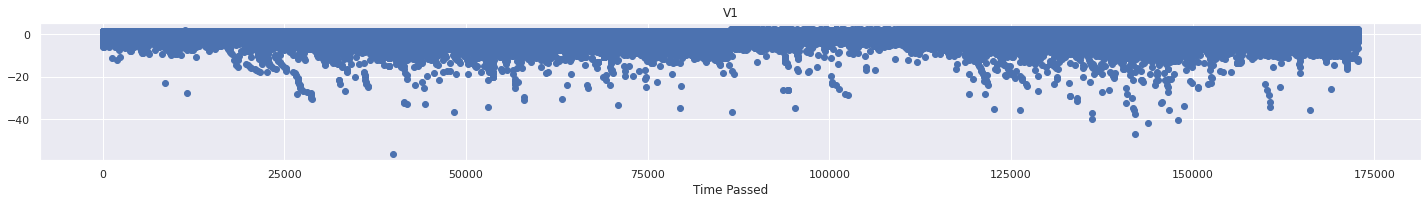

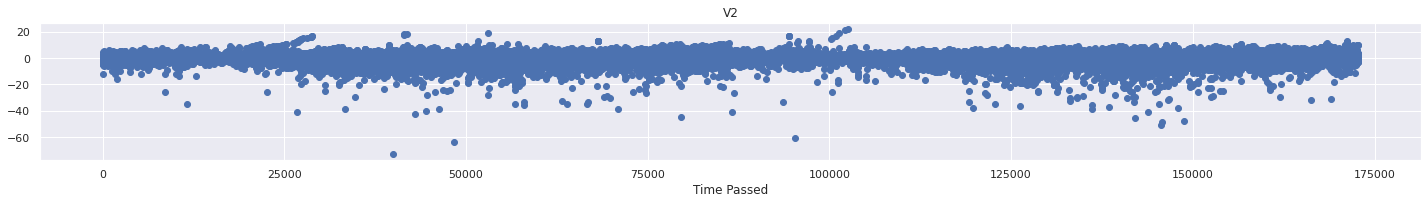

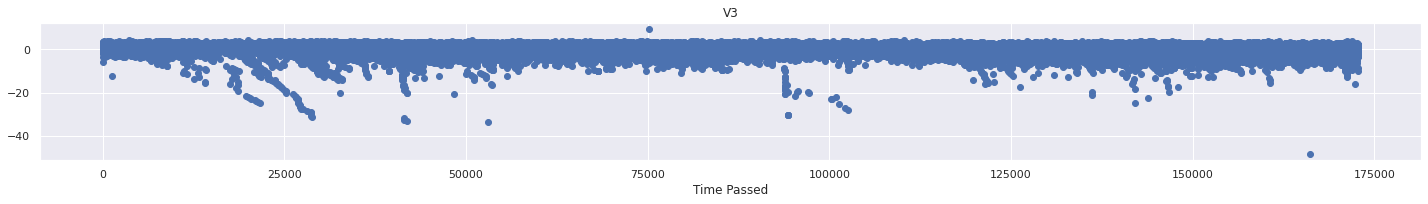

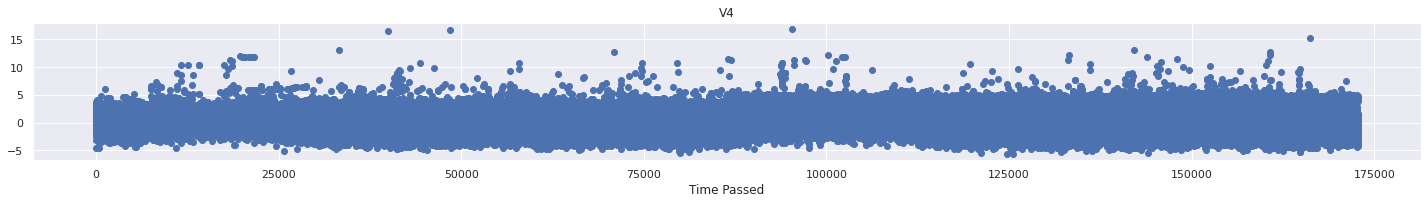

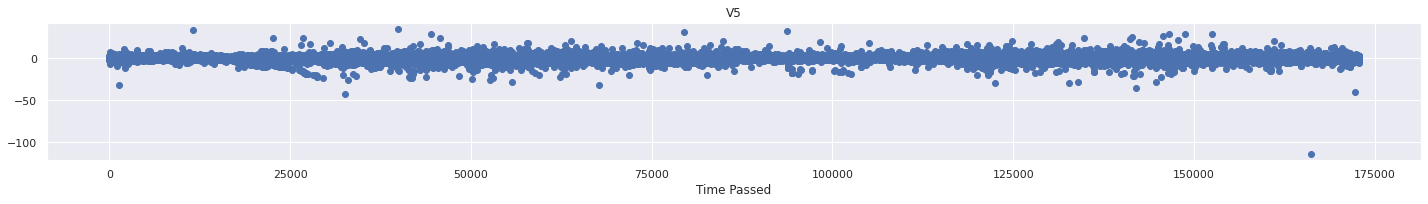

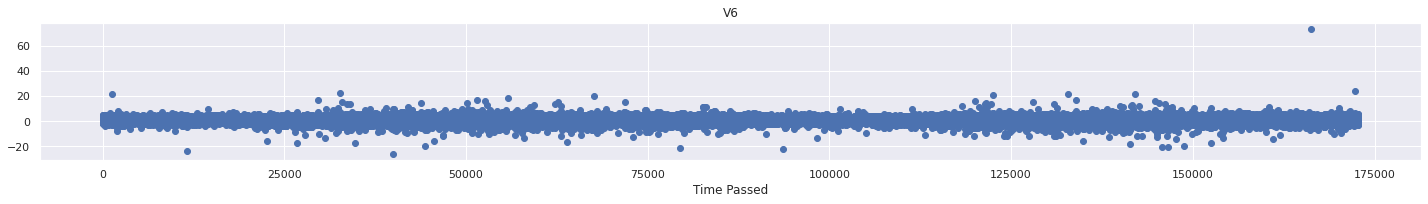

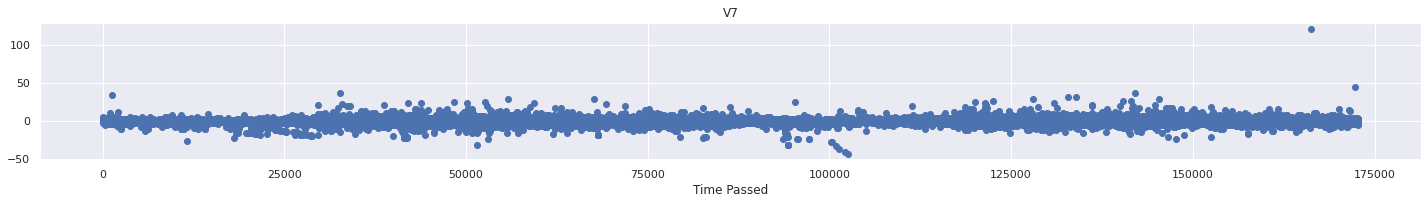

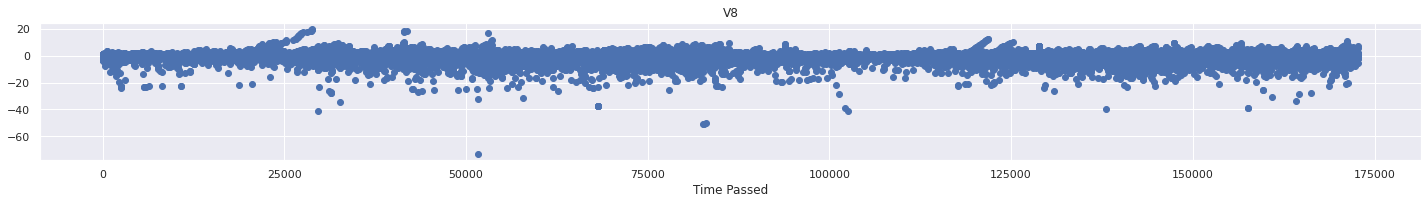

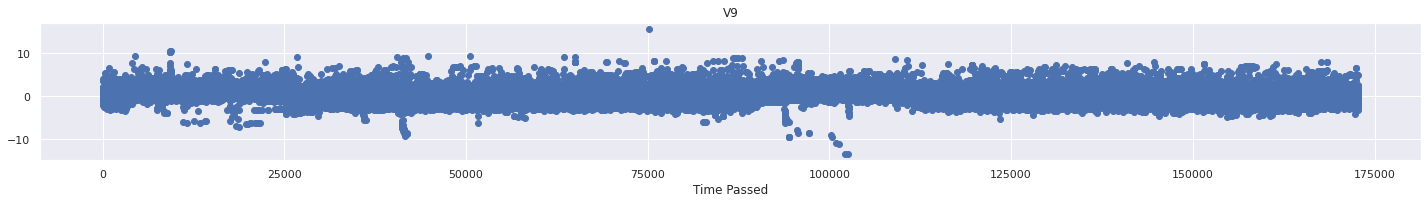

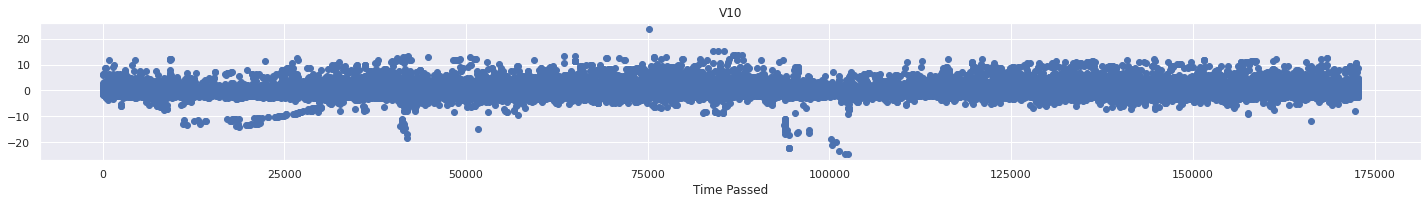

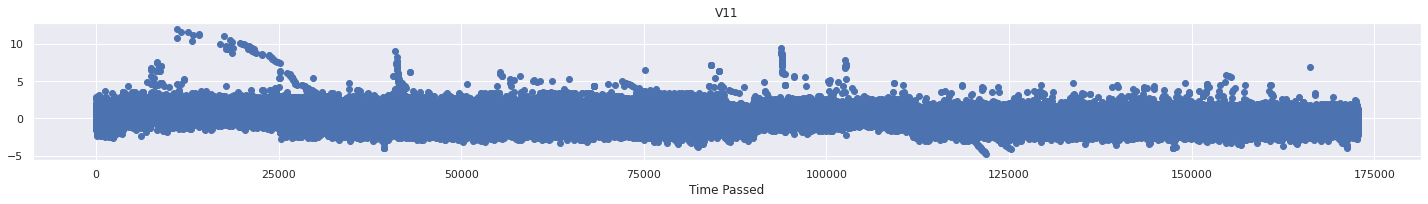

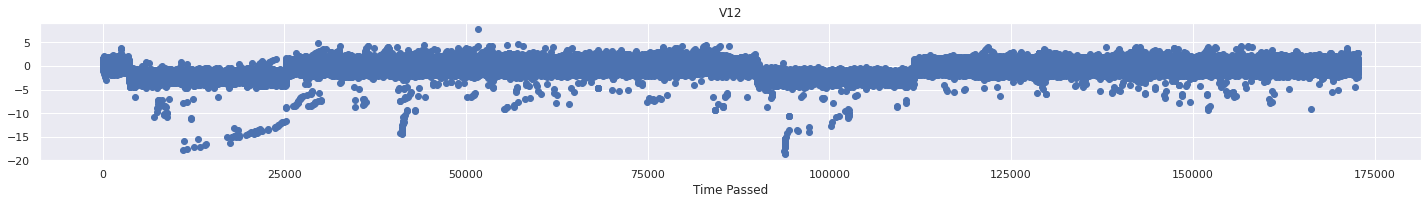

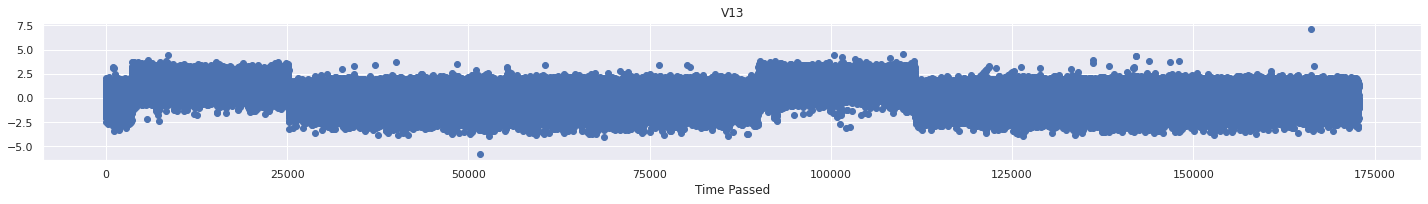

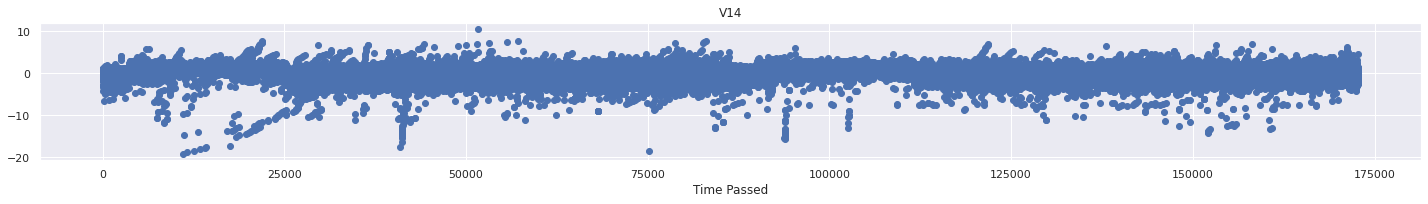

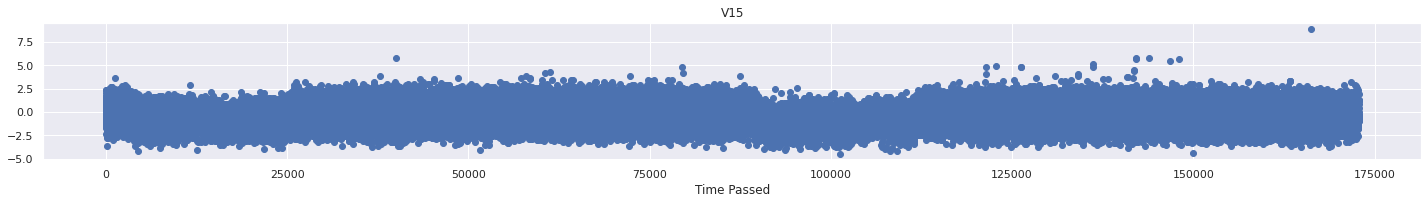

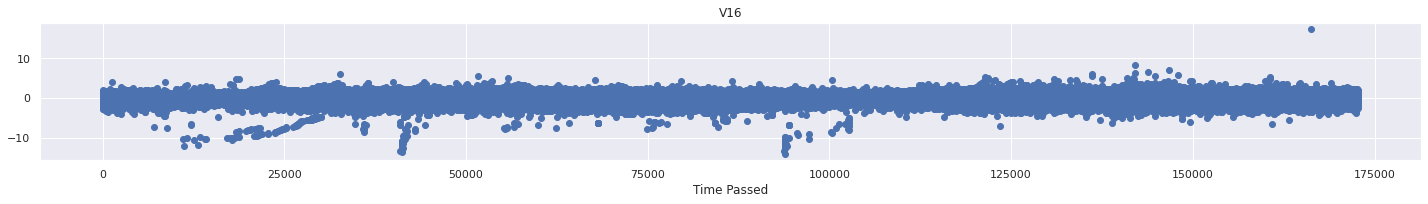

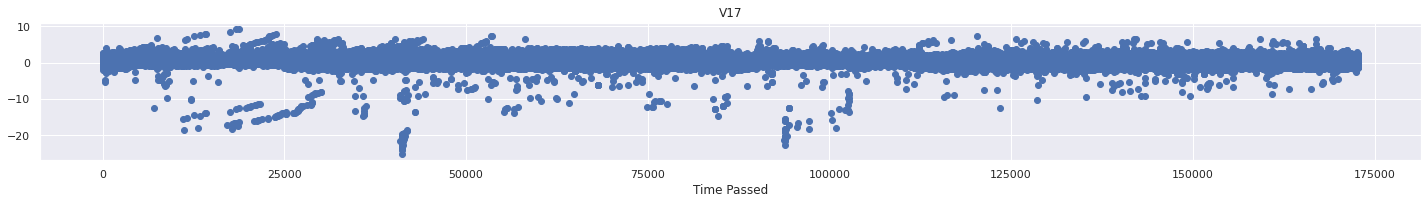

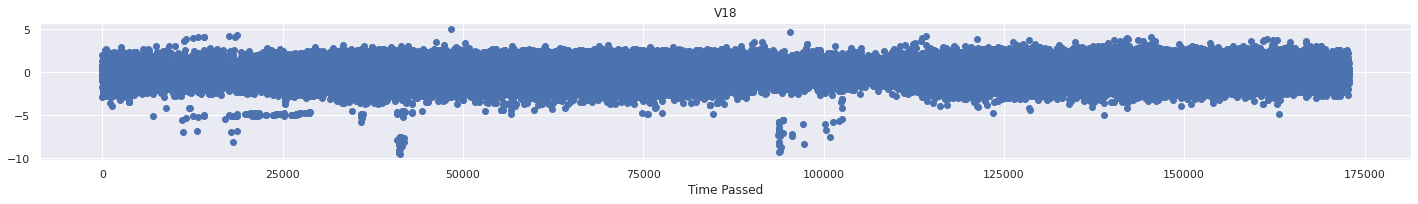

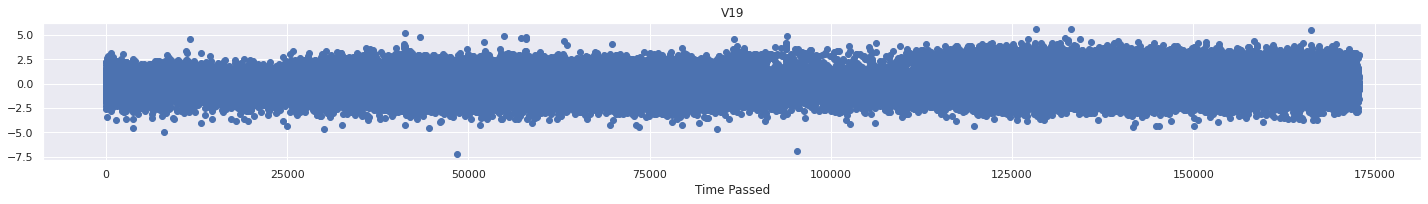

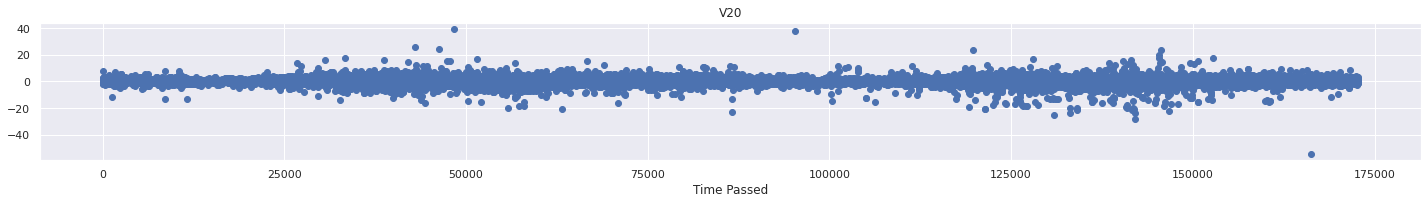

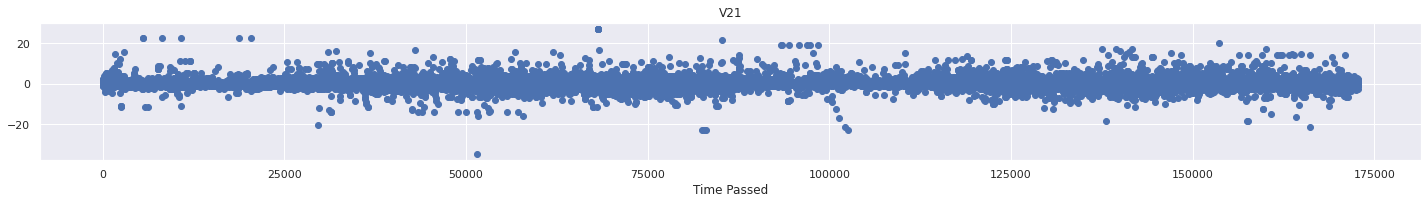

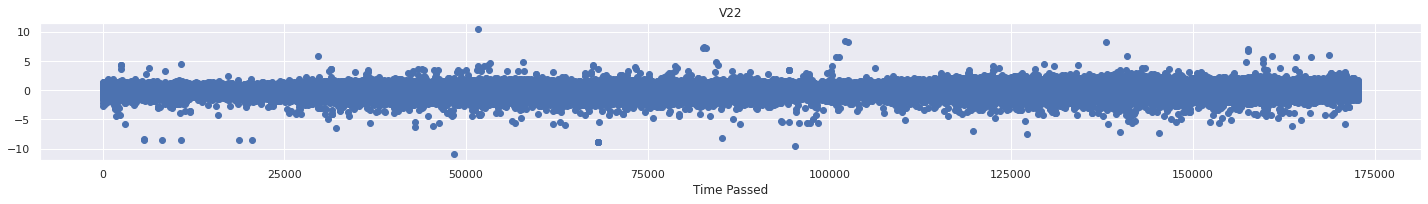

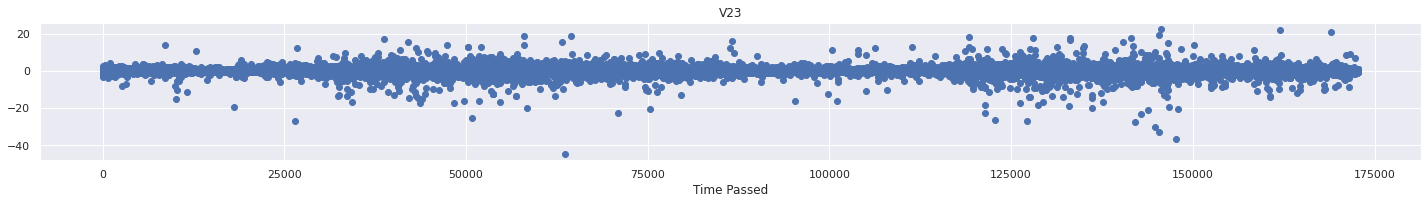

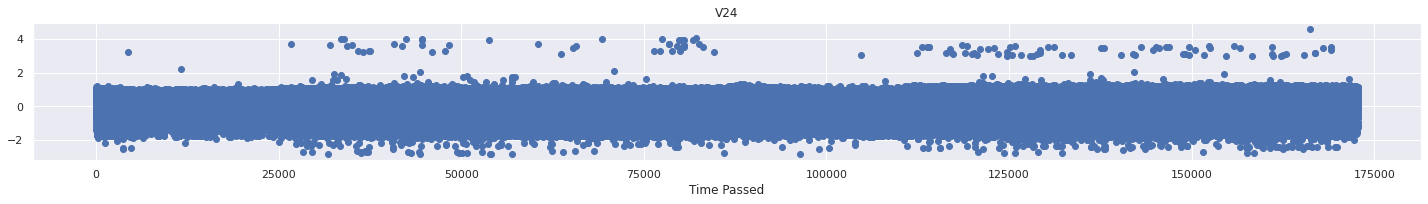

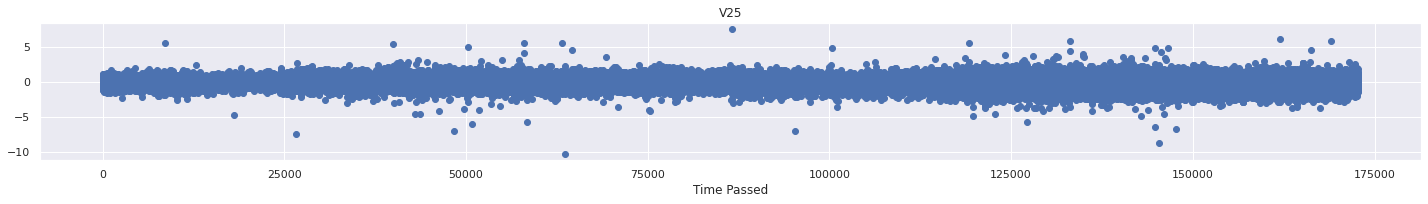

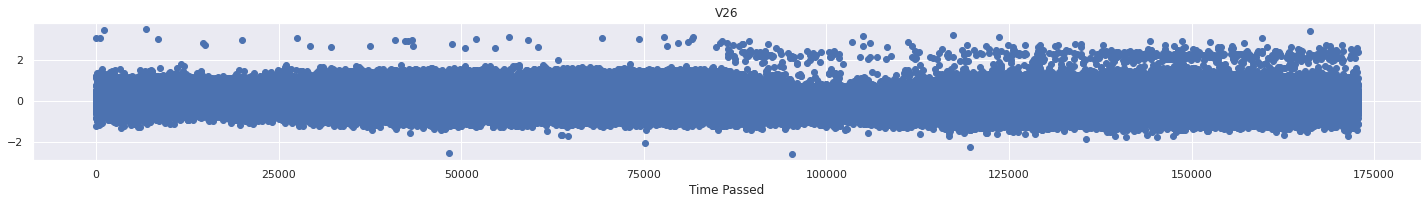

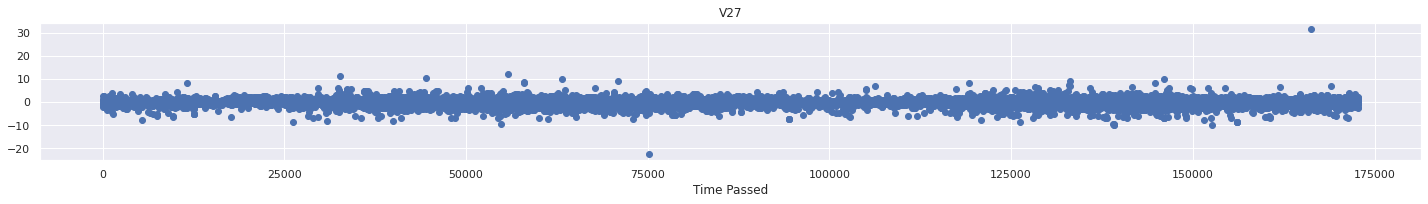

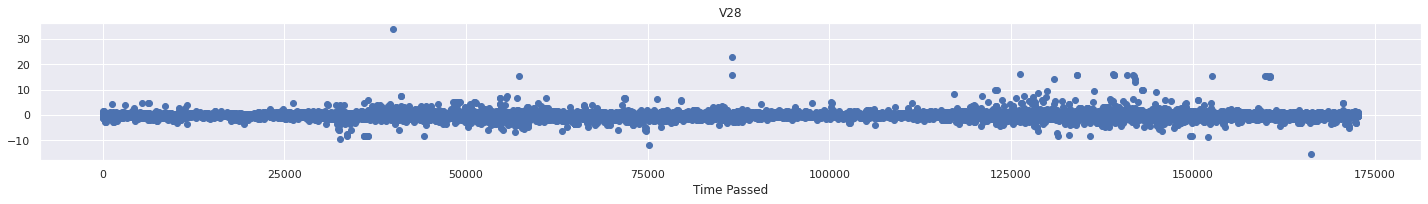

In [52]:
for column in df.columns:
    if column != 'Time' and column != 'Amount' and column != 'Class':
        plt.figure(figsize=(20,3))
        plt.scatter(x=df['Time'], y=df[column])
        plt.title(str(column))
        plt.xlabel("Time Passed")
        #plt.ylim(-100, 100)
        plt.show()
    else:
        continue

* Again, do not see any strong correlations between time and any of the principal components; what is noticeable is some components have what appear to be more outliers than others, and some have what appear to be larger ranges than others.

****3C. Bivariate Analysis of Amount****

*Distribution of Amount by Class (Frauds vs Non-Frauds)*

2125.87
25691.16


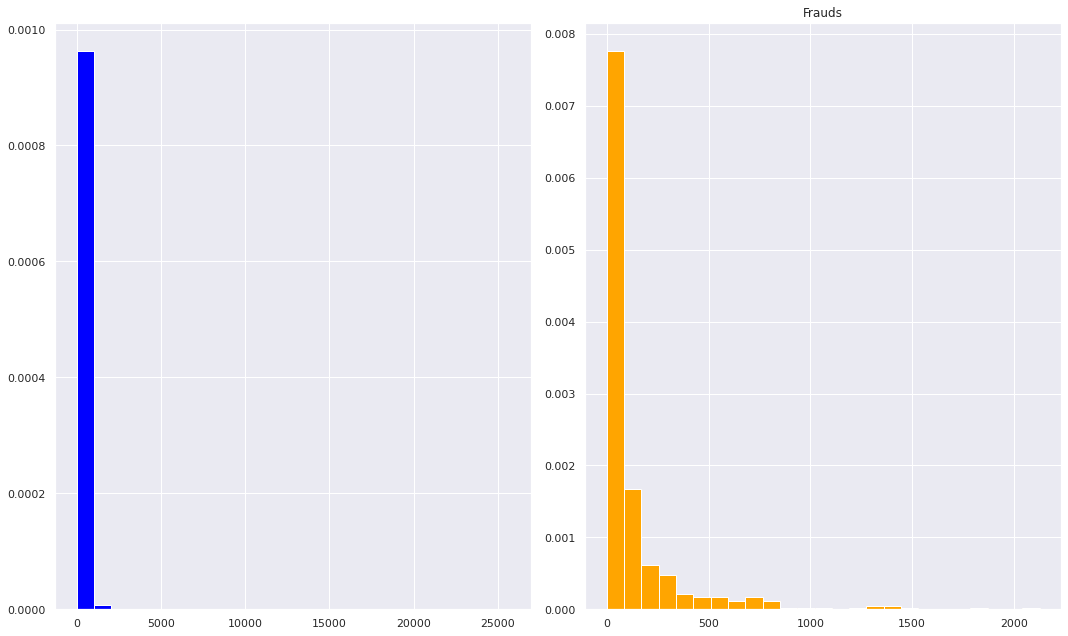

In [53]:
##Continued from above
###Now as three separate arrays
x1 = fraud_df['Amount']
print(max(x1))
x2 = nonfraud_df['Amount']
print(max(x2))

fig, (ax1, ax2) = plt.subplots(1, 2)

#Stack the data

ax1.hist(x2, bins=25, color='blue', density=True)
plt.title('Non-Frauds')
#plt.xlabel("Transaction Amount")
#plt.ylabel("Number of Occasions")
#plt.show()


ax2.hist(x1, bins=25,color='orange', density=True)
plt.title('Frauds')
#plt.xlabel("Transaction Amount")
#plt.ylabel("Number of Occasions")
plt.show()

* Corresponding to the amount analysis earlier, in the cause of non-fraud (blue) and fraud (orange), both are skewed toward transactions with lower prices; we will see about the outliers a little later.

*Correlation between Amount and V1-V28*

In [54]:
df[[column for column in df.columns if column != 'Time' and column != 'Class']].corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,...,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709
V2,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,...,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409
V3,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,...,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880
V4,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,...,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732
V5,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,...,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356
V6,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,...,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981
V7,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,...,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311
V8,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,...,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079
V9,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,...,-2.343720e-16,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246
V10,7.388135e-17,-3.991394e-16,1.156587e-15,2.232685e-16,-5.202306e-16,5.932243e-17,-7.492834e-17,-2.801370e-16,-4.642274e-16,1.000000e+00,...,-1.331556e-15,1.177547e-15,-6.418202e-16,3.214491e-16,-1.355885e-16,-2.846052e-16,-3.028119e-16,-2.197977e-16,4.864782e-17,-0.101502


* Scrolling to the Amount column, it does appear that there is strong correlations between some of the principal components and some of the amounts; below we will see a reason why this is possibly the case.

****3D. Analysis of Class****

*Class (Fraud, Non-Fraud) and Distribution of Amount*

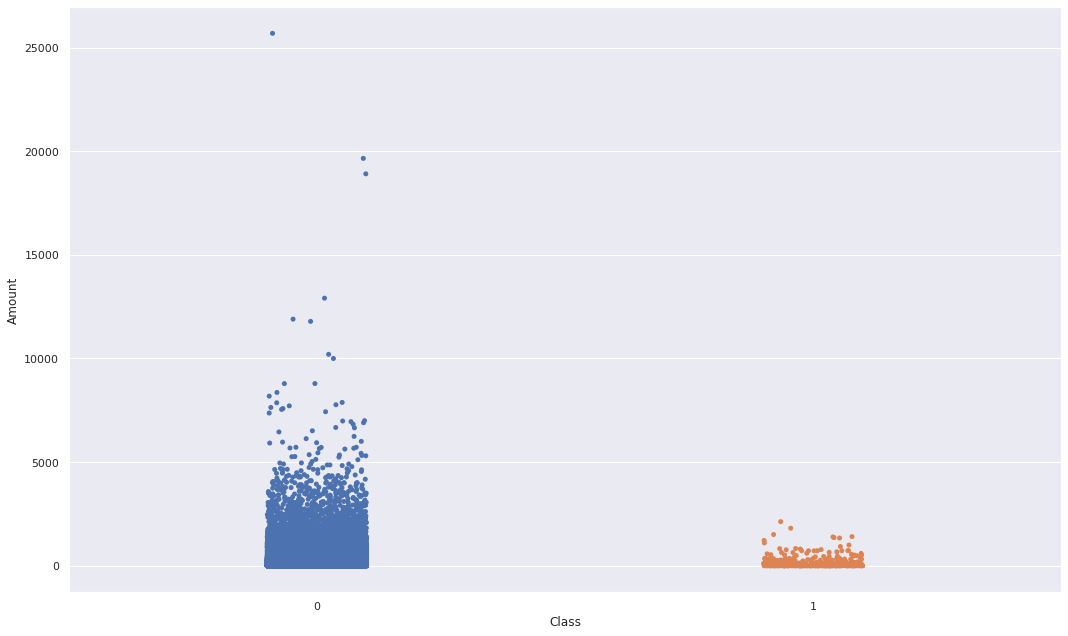

In [55]:
sns.stripplot(x=df['Class'],y=df['Amount'])
plt.show()

* From the stripplot above, we can see it is the non-fraudulent transactions that account for the much bigger transactions in the dataset (may make sense as those big transactions would make it more difficult to commit fraud), and does account for the $25,691 transaction, which is the highest transaction amount in the dataset. Fraud transactions amounts are relatively small and rangebound.

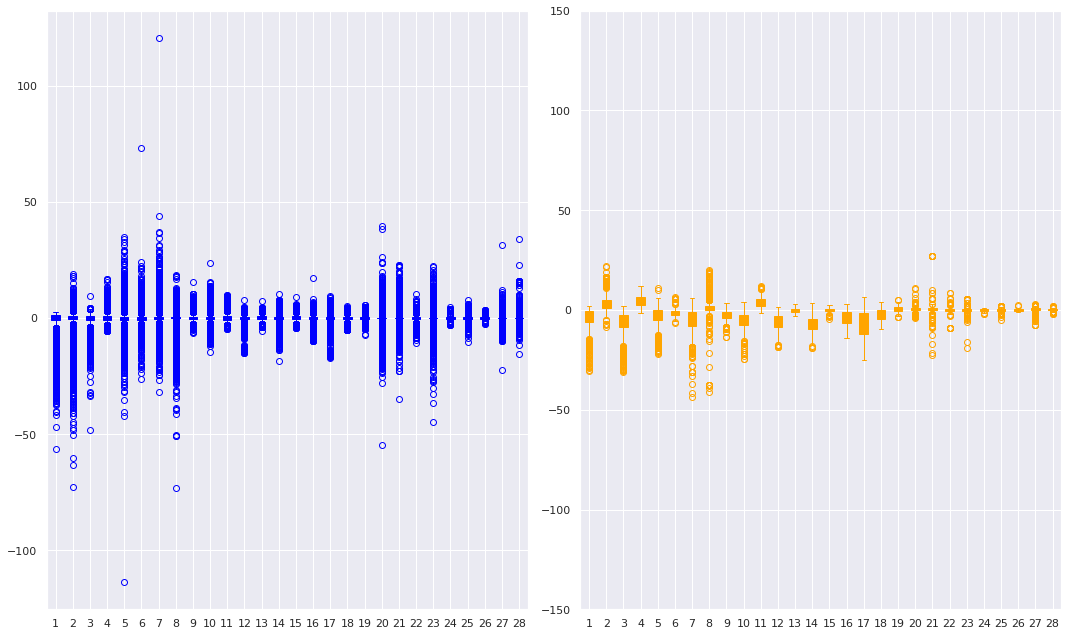

In [56]:
V_df = pd.DataFrame(data = df[[columns for columns in df.columns if columns != 'Time' and columns != 'Amount']],\
                    columns = [columns for columns in df.columns if columns != 'Time' and columns != 'Amount'])

V_fraud_df = V_df.loc[V_df['Class'] == 1]
V_nonfraud_df = V_df.loc[V_df['Class'] == 0]

V_fraud_df = V_fraud_df.drop(columns=['Class'])
V_nonfraud_df = V_nonfraud_df.drop(columns=['Class'])

fig, (ax1, ax2) = plt.subplots(1, 2)

plt.ylim(-150, 150)
c = "blue"
ax1.boxplot(V_nonfraud_df, patch_artist=True, boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))

plt.ylim(-150, 150)
c="orange"
ax2.boxplot(V_fraud_df, patch_artist=True, boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))

plt.show()

* Though we are unaware of what the principal components are in specific, we can see that the ranges are broader in the non-fraudulent transactions (blue) than in the fraudulent transactions (orange), similar to the amounts, meaning there may be some correlation there.

* There also seem to be a lot more outliers in the non-fraudulent principal components.

array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

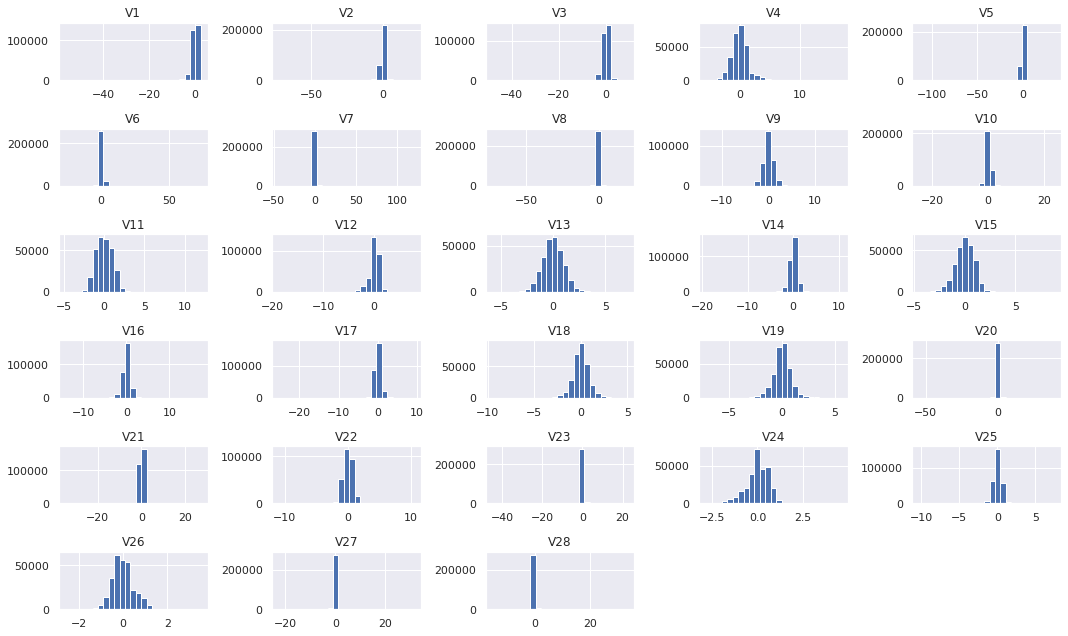

In [57]:
df[[columns for columns in df.columns if columns != 'Time' and columns != 'Amount' and columns != 'Class']].hist(bins=25)

* Even with the outliers, in general the principal components seem to be normally distributed, which would be assumed given standardization is part of the PCA process.

* Now let's relook at correlations within the dataset;

*Class and Correlation to other variables*

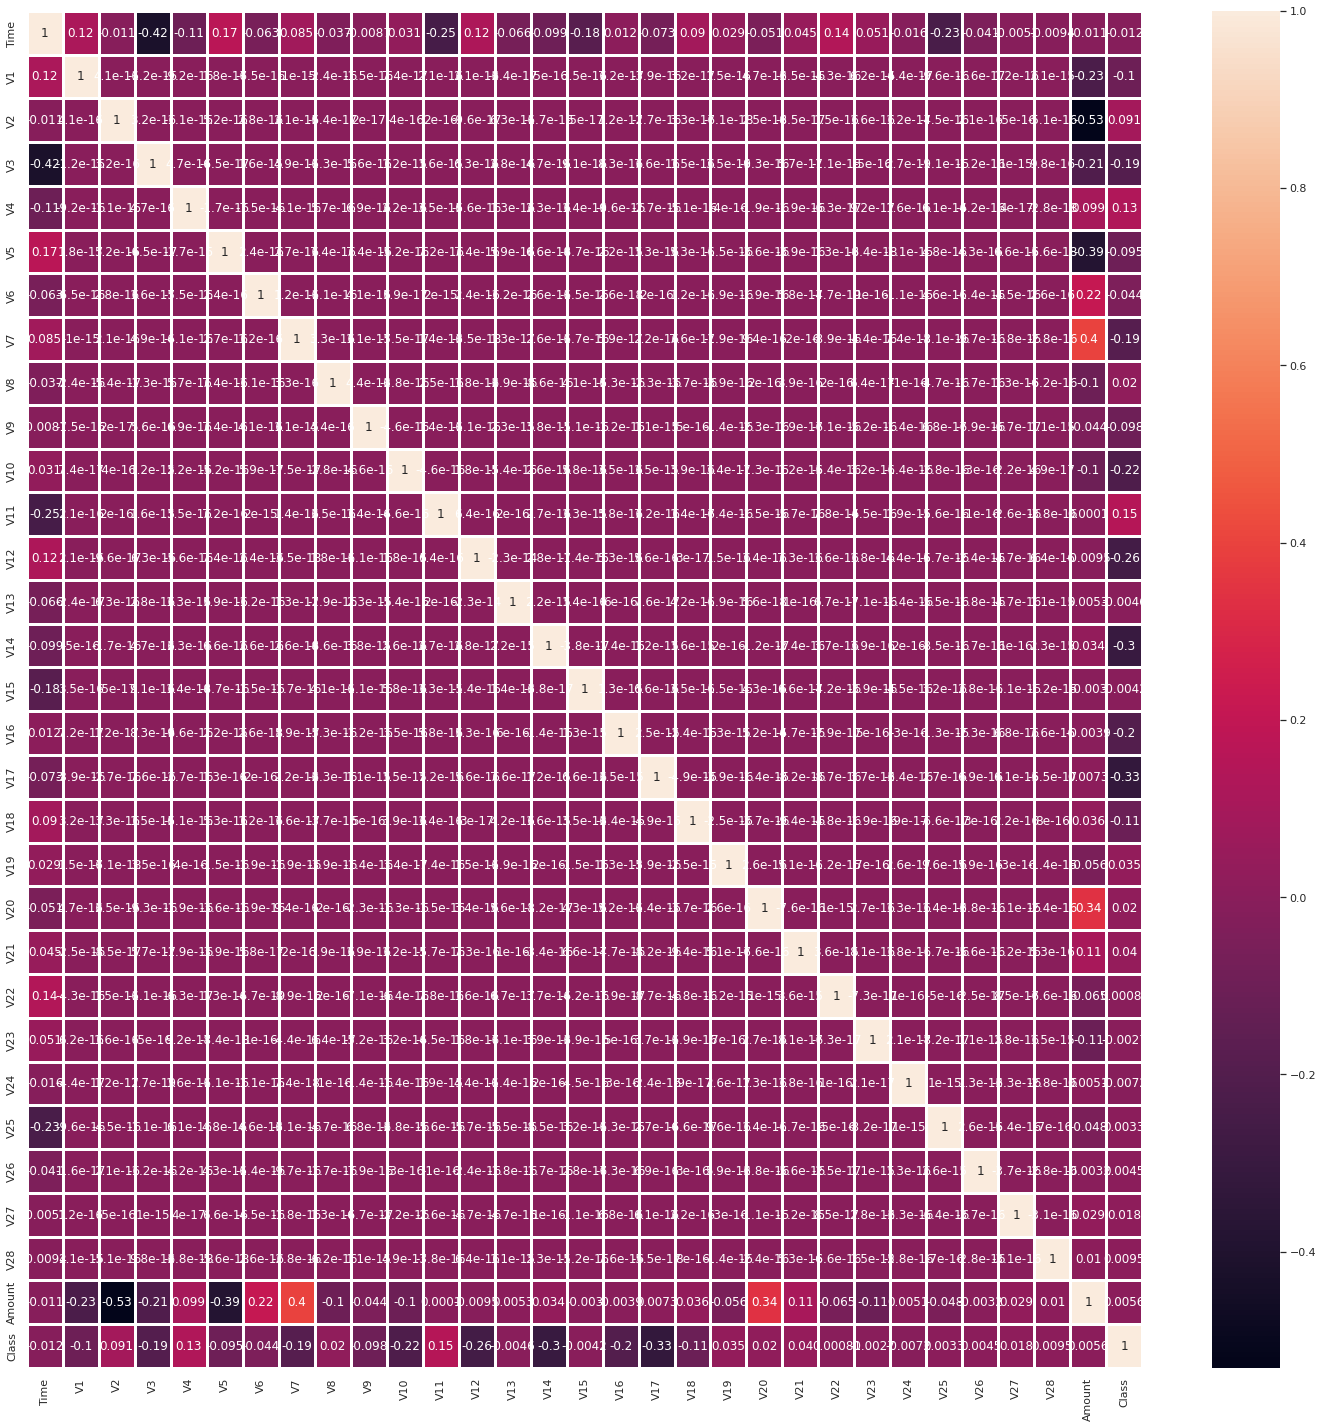

In [58]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), linewidths=3, annot=True) #[['Time', 'Amount', 'Class']]
plt.show()

* Notes:

1. No strong correlation between any of the principal components themselves.

2. Strong negative correlations between Amount and V2/V5 (strongest correlation in the dataset is the negative one between Amount and V2); material positive correlations between Amount and V7/V20. Strongest correlations are between amounts and principal components.

3. Material negative correlations between Class and principal components, strongest being with V17.

4. Material negative correlations between Time and principal components, strongest being with V3.

5. Neither Time nor Amount seem to have a strong correlation on Class, which makes sense since the outliers of amounts are few and time does not appear to skew the relative interspersing of fraudulent and nonfraudulent transactions.

<a id="Declare feature vector and target variable"></a>
# **<font size="5">4. Declare feature vector and target variable</font>**

In [59]:
X = df[[columns for columns in df.columns if columns != 'Class' and columns != 'Time']]
y = df['Class']

<a id="Split data into separate training and test set"></a>
# **<font size="5">5. Split data into separate training and test set</font>**

In [60]:
from sklearn.model_selection import train_test_split

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)
  
# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
              V1        V2        V3        V4        V5        V6        V7  \
241328 -0.231826  0.601090 -0.149928 -0.758778  0.657062 -0.810840  0.680413   
217667  0.506143 -3.698530 -1.853962 -0.597949 -0.735140  2.014108 -0.221140   
250262  2.018206  0.083209 -1.612289  0.349719  0.346203 -0.673006  0.059823   
162728  2.069414  0.160514 -1.659861  0.441607  0.361637 -0.941688  0.183323   
160293  2.136250 -0.065820 -1.782492  0.002846  0.557054 -0.482042  0.131904   

              V8        V9       V10  ...       V20       V21       V22  \
241328 -0.052384  0.170149  0.100565  ... -0.187693 -0.173126 -0.481237   
217667  0.375140 -0.111724  0.316292  ...  1.513085  0.347141 -0.712100   
250262 -0.078856  0.281864 -0.197967  ... -0.176069 -0.305062 -0.830483   
162728 -0.240196  0.494401 -0.376487  ... -0.164188 -0.358937 -0.929205   
160293 -0.230526  0.842824 -0.090740  ... -0.217149  0.210170  0.745852   

             V23       V24       V25       V26       V27 

<a id="Choose Classifiers"></a>
# **<font size="5">6. Choose Classifiers</font>**

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

A little rudimentary info on each classifier...

* GaussianNB = Probability function using conditional probabilities (class of an instance given certain inputs, based on naive version of Bayes Theorem)

* DecisionTreeClassifier = Flowchart-like function which chooses important features of the dataset and makes decisions based off of it (binary reservice functioning)

* KNeighborsClassifier = Memorizes all of the data points positions in a dataset and predicting the class of the datapoint based on the class of data points most closely surrounding the datapoint in question

* SVC = Separates classes into clusters and classifiers based on those

* RandomForestClassifier = Fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the score

* SGDClassifier = Uses gradient descent to find the equation with optimal parameters

* LogisticRegression = Probabilistic version of linear regression using natural log to guess probability

* CalibratedClassifierCV = Uses model calibration (SVC and SGDClassifier), gives probabilities to algorithms where probabilities would not have been possible dut to the model not having functionality of predict proba

In [62]:
classifiers = [
    LogisticRegression(solver='lbfgs'),
    GaussianNB(),
    DecisionTreeClassifier(random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(max_depth=2, random_state=0),
    SGDClassifier(max_iter=1000, tol=1e-3),
    LinearSVC(random_state=0)]

<a id="Choose Classification Metrics"></a>
# **<font size="5">7. Choose Classification Metrics</font>**

Because we are explicitly advised against accuracy in the problem (as we have seen the extreme class imbalance in the data), below are the metrics we will be using in our analysis:

In [64]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

**1. Precision-Recall Curve**

From Scikit-Learn:

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Precision is defined as the number of true positives over the number of true positives plus the number of false positives (TP/(TP+FP)).

Recall is defined as the number of true positives over the number of true positives plus the number of false negatives (TP/(TP+FN)). See below:

![PR Curves](https://lh6.googleusercontent.com/eoPVZacPeZ0whltKBBUR7n5ApdzRKvh2wYwiLN9paUtm6dpJB322R3VcUnsfXuegvXtyGiU4Qgg3kEZsYYycreSw0O5Mv3OSBDPpyFoj2QVZp8dx17I1bAwu1KmgPz18DBIC13q2)

As it represents precision (y axis) against recall (x axis), the worst baseline model is a model with zero precision.

The difference from a metric such as ROC AUC score is it doesn't take True Negatives into consideration whatsoever.


**2. F1 Score**

The F1-Score metric is a harmonic mean between precision and recall; best when both precision and recall are of interest in the problem.

![F1 Score](https://images.deepai.org/user-content/9954225913-thumb-4901.svg)

<a id="Classification Testing - Standardized Data"></a>
# **<font size="5">8. Classification Testing - Standardized Data</font>**

In this step, we will standardize the data, which will find the mean value of each variable and find the standard deviation based off of the data. In running tests, this option is proven to deliver better results than normalizing the data or keeping the data raw.

In [67]:
cols = X_train.columns

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_stan = scaler.fit_transform(X_train)
X_test_stan = scaler.transform(X_test)

X_train_stan = pd.DataFrame(X_train_stan, columns=[cols])
X_test_stan = pd.DataFrame(X_test_stan, columns=[cols])

In [69]:
X_train_stan.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,...,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05
mean,-1.728914e-17,-5.987580e-19,3.017075e-17,-2.903976e-17,4.640374e-18,-8.781783e-18,6.241220e-18,1.663217e-20,-1.663217e-17,-1.033689e-17,...,-1.829538e-18,3.492755e-19,-3.022064e-17,3.875295e-18,1.077764e-17,-1.370490e-17,1.227454e-17,-2.511457e-18,-3.234956e-18,-2.079021e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.383869e+01,-3.805683e+01,-3.188664e+01,-4.009058e+00,-8.195625e+01,-1.755284e+01,-3.496430e+01,-4.283092e+01,-1.221433e+01,-2.255852e+01,...,-6.990944e+01,-3.125069e+01,-1.506817e+01,-7.028095e+01,-4.685455e+00,-1.971058e+01,-5.406420e+00,-5.521796e+01,-4.635404e+01,-3.522582e-01
25%,-4.680122e-01,-3.580970e-01,-5.889298e-01,-5.991580e-01,-4.981314e-01,-5.753754e-01,-4.439757e-01,-1.763072e-01,-5.852136e-01,-4.917684e-01,...,-2.713146e-01,-3.113794e-01,-7.496324e-01,-2.538256e-01,-5.857936e-01,-6.071270e-01,-6.775613e-01,-1.733771e-01,-1.596873e-01,-3.301230e-01
50%,9.499142e-03,4.129547e-02,1.186372e-01,-1.493157e-02,-4.022185e-02,-2.057034e-01,3.290610e-02,1.844794e-02,-4.756698e-02,-8.481972e-02,...,-8.062917e-02,-3.934124e-02,8.632727e-03,-1.724040e-02,6.721907e-02,3.143750e-02,-1.074862e-01,3.255005e-03,3.311628e-02,-2.646727e-01
75%,6.708479e-01,4.842802e-01,6.786711e-01,5.244518e-01,4.396631e-01,2.966765e-01,4.591447e-01,2.764173e-01,5.435716e-01,4.165975e-01,...,1.706503e-01,2.564092e-01,7.279484e-01,2.321278e-01,7.266422e-01,6.728115e-01,4.995025e-01,2.228420e-01,2.348679e-01,-4.467403e-02
max,1.250267e+00,1.325381e+01,6.190455e+00,1.190310e+01,2.456881e+01,5.475609e+01,9.680299e+01,1.690520e+01,1.417809e+01,2.178478e+01,...,5.056903e+01,3.714274e+01,1.152380e+01,3.533452e+01,7.568394e+00,1.440017e+01,7.093488e+00,7.735408e+01,6.795230e+01,1.019283e+02


No skill: auc=0.002
LogisticRegression : f1=0.673 auc=0.697
GaussianNB : f1=0.115 auc=0.396
DecisionTreeClassifier : f1=0.753 auc=0.753
KNeighborsClassifier : f1=0.839 auc=0.841
RandomForestClassifier : f1=0.644 auc=0.702
SGDClassifier : f1=0.636 auc=0.680
LinearSVC : f1=0.667 auc=0.723


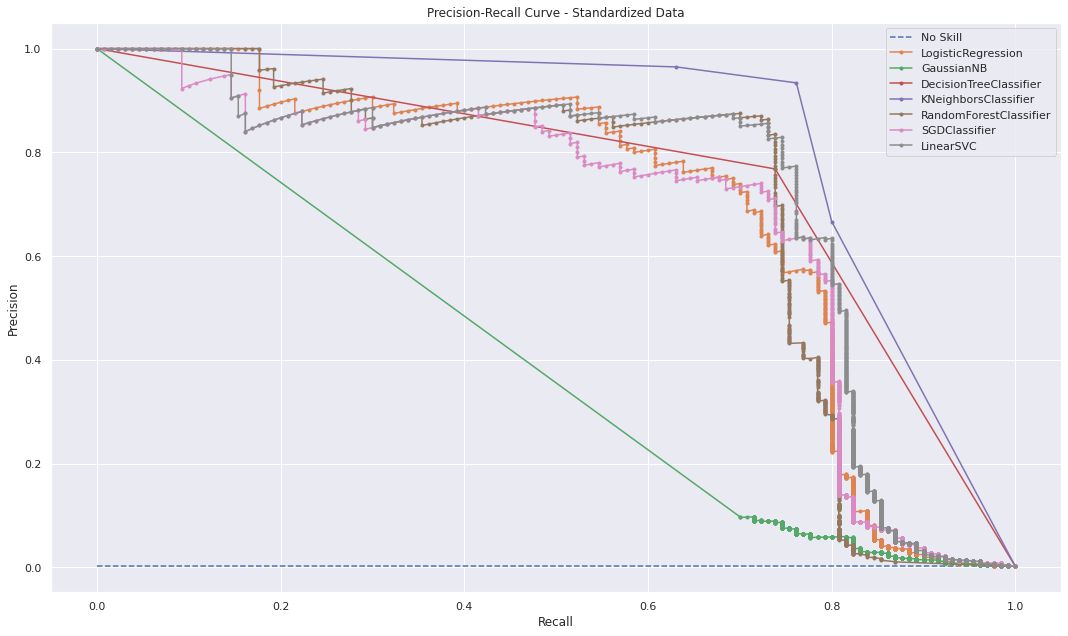

In [71]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
print('No skill: auc=%.3f' % (no_skill))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

for clf in classifiers:
    classifier = clf
    classifier.fit(X_train_stan, y_train)
    if clf == classifiers[5] or clf == classifiers[6]:
        classifier = CalibratedClassifierCV(classifier, cv='prefit')
        classifier.fit(X_train_stan, y_train)
    # predict probabilities
    clf_probs = classifier.predict_proba(X_test_stan)
    # keep probabilities for the positive outcome only
    clf_probs = clf_probs[:, 1]
    # predict class values
    yhat = classifier.predict(X_test_stan)
    # calculate precision and recall for each threshold
    clf_precision, clf_recall, _ = precision_recall_curve(y_test, clf_probs)
    # calculate scores
    clf_f1, clf_auc = f1_score(y_test, yhat), auc(clf_recall, clf_precision)
    # summarize scores
    print(str(type(clf).__name__),': f1=%.3f auc=%.3f' % (clf_f1, clf_auc))
    # plot the precision-recall curves
    plt.plot(clf_recall, clf_precision, marker='.', label=str(type(clf).__name__))

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# title
plt.title('Precision-Recall Curve - Standardized Data')
# show the plot
plt.show()

*** KNeighborsClassifier, the best performer, generated a 84% AUC-PR. We will move forward with this algorithm.**

<a id="Hyperparameter Optimization using HalvingGridSearchCV"></a>
# **<font size="5">9. Hyperparameter Optimization using HalvingGridSearchCV</font>**

The K Nearest Neighbors Classifier (KNN) has won, and now we want to optimize the hyperparameters to see if we can improve the results that it generates; the problem is KNN is computationally exhaustive due to the fact every iteration is spent going through each datapoint in the dataset and determining which datapoints are closest to the subject point based on inputs, and from that predicting what the class likely is. 

Because this is such a large dataset, Grid/Random Search is not really feasible, so we will utilize Halving Grid Search, where training is performed on subsets of data rather than the entire data for each iteration, each time filtering out poor performing data and needing to run less iterations over the entire dataset.

Even having significantly decreased the time for grid search, this method still surpassed 4 hours; seeing how that was the case, and seeing how minimally the performance was affected by hyperparameters, I will simply list the optimal hyperparameters that were found as opposed to keeping it as part of the code:

* n_neighbors = 5

* leaf_size = 20

* metric = minkowski 

* p = 2 

* weights = uniform

It should be noted from the above:

1. 'N_neighbors = 5' means the closest five datapoints will be utlized to predict the class of the           datapoint being tested on.

2. 'Leaf_size = 20' means at each node in the tree which the algorithm could create (see https://shubh-     tripathi.medium.com/knn-7be936cea811), there will be at minimum 20 data points.

3. 'Metric = minkowski' and 'p = 2' means that Minkowski distance is equal to Euclidean distance, which     is the square root of the sum of the square of difference between each attribute of the two             observations (see https://iq.opengenus.org/minkowski-distance/). High dimensionality may still be a     drawback in the case of this dataset, but still works best.

4. 'Weights = uniform' means that each datapoint which is used to predict the class of a datpoint is         weighted equally, and not based on distance.

<a id="Run KNeighborsClassifer with optimal hyperparameters"></a>
# **<font size="5">10. Run KNeighborsClassifer with optimal hyperparameters</font>**

In [1]:
from sklearn.metrics import accuracy_score

# instantiate classifier with optimal hyperparameters
KNN = KNeighborsClassifier(n_neighbors=7, leaf_size= 20, metric= 'minkowski', p= 2, weights= 'uniform') 


# fit classifier to training set
KNN.fit(X_train_stan,y_train)


# make predictions on test set
y_pred_test=KNN.predict(X_test_stan)


# compute and print accuracy score
print('Model accuracy score with optimal hyperparameters : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

NameError: name 'KNeighborsClassifier' is not defined

**Compare the train-set and test-set accuracy**

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [77]:
y_pred_train = KNN.predict(X_train_stan)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9997


**Check for overfitting and underfitting**

In [79]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(KNN.score(X_train_stan, y_train)))

print('Test set score: {:.4f}'.format(KNN.score(X_test_stan, y_test)))

Training set score: 0.9997
Test set score: 0.9995


**Compare model accuracy with null accuracy**

In [80]:
# check class distribution in test set

y_test.value_counts()

0    71072
1      130
Name: Class, dtype: int64

In [81]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


<a id="Confusion Matrix"></a>
# **<font size="5">11. Confusion Matrix</font>**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [82]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[71065     7]
 [   31    99]]

True Positives(TP) =  71065

True Negatives(TN) =  99

False Positives(FP) =  7

False Negatives(FN) =  31


The confusion matrix shows 71065 + 99 = 71164 correct predictions and 7 + 31 = 38 incorrect predictions.

In this case, we have

* True Positives (Actual Positive:1 and Predict Positive:1) - 71065

* True Negatives (Actual Negative:0 and Predict Negative:0) - 99

* False Positives (Actual Negative:0 but Predict Positive:1) - 7 (Type I error)

* False Negatives (Actual Positive:1 but Predict Negative:0) - 31 (Type II error)

This kind of performance is expected given the imbalance; though it is not the greatest metric in these cases, it should still be checked, as if the classifier isn't performing well, it can alert us to some issue.

<AxesSubplot:>

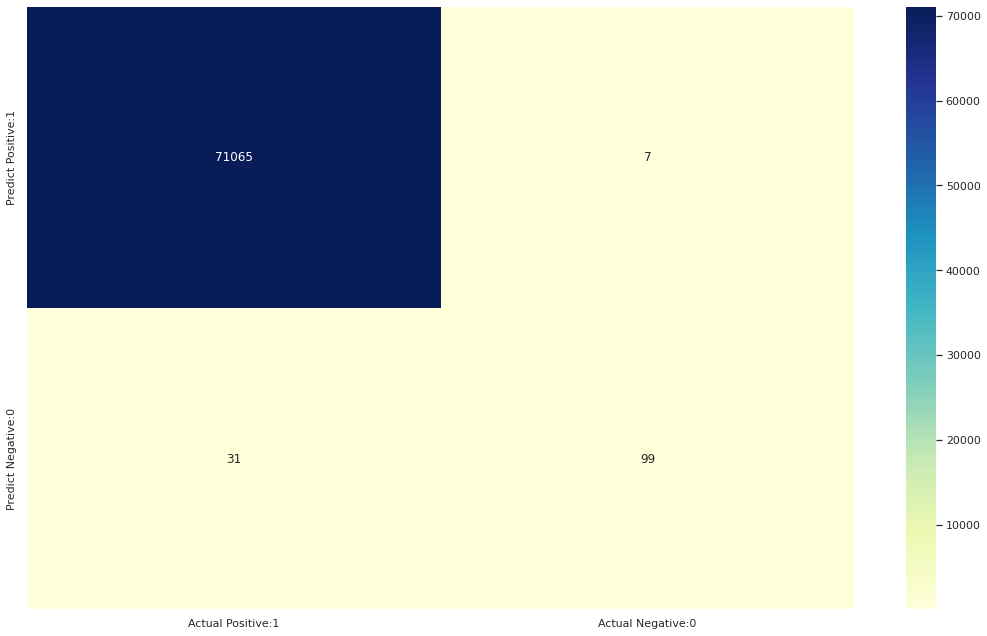

In [83]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<a id="Classification Matrices"></a>
# **<font size="5">12. Classification Matrices</font>**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71072
           1       0.93      0.76      0.84       130

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



* Recall does seem to be lagging precision in the case of positive classes...

In [85]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

**Classification accuracy**

In [86]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9995


* It should be noted that the imbalanced negative class represented 0.9982 of the dataset; accuracy which exceeds that is a good sign.

**Classification error**

In [88]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0005


**Precision**

In [89]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9999


**Recall**

In [90]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9996


**True Positive Rate**

**True Positive Rate** is synonymous with **Recall**.

In [91]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9996


**False Positive Rate**

In [92]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0660


**Specificity**

In [93]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9340


**f1-score**

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

**Support**

Support is the actual number of occurrences of the class in our dataset.

<a id="AUC-PR"></a>
# **<font size="5">13. AUC-PR</font>**

Below will be an illustration of the optimized KNN classifier itself, against a no skill classifier.

No Skill: auc=0.002
KNeighborsClassifier : f1=0.839 auc=0.841


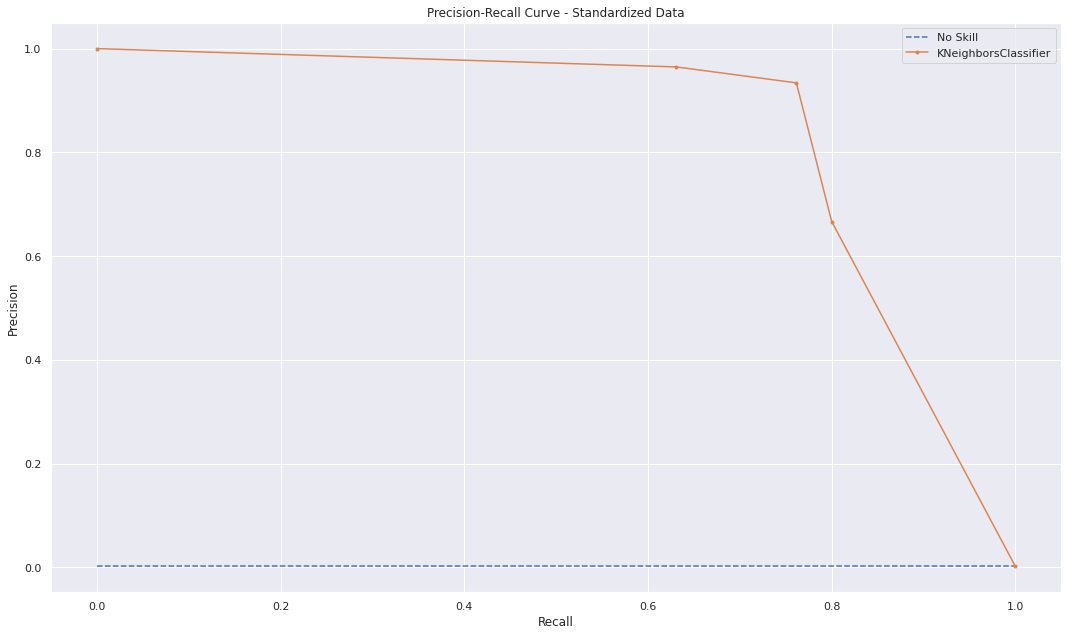

In [97]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
print('No Skill: auc=%.3f' % (no_skill))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

KNN.fit(X_train_stan, y_train)
# predict probabilities
KNN_probs = KNN.predict_proba(X_test_stan)
# keep probabilities for the positive outcome only
KNN_probs = KNN_probs[:, 1]
# predict class values
yhat = KNN.predict(X_test_stan)
# calculate precision and recall for each threshold
KNN_precision, KNN_recall, _ = precision_recall_curve(y_test, KNN_probs)
# calculate scores
KNN_f1, KNN_auc = f1_score(y_test, yhat), auc(KNN_recall, KNN_precision)
# summarize scores
print(str(type(KNN).__name__),': f1=%.3f auc=%.3f' % (KNN_f1, KNN_auc))
# plot the precision-recall curves
plt.plot(KNN_recall, KNN_precision, marker='.', label=str(type(KNN).__name__))

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# title
plt.title('Precision-Recall Curve - Standardized Data')
# show the plot
plt.show()

* It does seem that precision seems to really fall off at about the 0.76 point that we saw in the classification matrices.

<a id="Conclusion"></a>
# **<font size="5">14. Conclusion</font>**

There are outliers in our dataset. By standardizing the dataset, we tend to these outliers and improve the performance of all models relative to when the data is untransformed.

Accuracy is strong for the KNeighbors Classifier algorithm, as it was for all of the classifiers due to the dataset's class imbalance, but the imbalance renders it an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we explore a confusion matrix that provide better guidance in selecting models. We get maximum F1 and precision-recall results with KNeighborsClassifier, at above 80% for both metrics. High dimensionality and the Euclidean distance metric used by the classifier may possibly bring about a curse of dimensionality, which renders datapoints more uniformly distant from each other than otherwise...maybe some of the principal components could be moved out, maybe not.

Testing accuracy of 0.9995 exceeds 0.9982 (existence of negative instances in the dataset), which is a good sign.